In [8]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

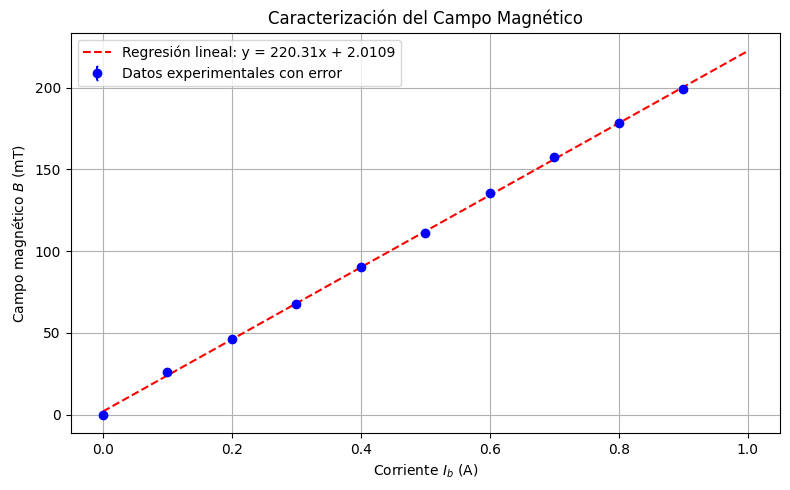

In [7]:
#Actividad 1: Caracterización de la bobina

# Datos experimentales
I_b = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])  # Corriente (A)
B = np.array([0, 25.9, 46.5, 67.9, 90.1, 111.1, 135.5, 157.3, 178.1, 199.1])  # Campo magnético (mT)

# Error del teslámetro en escala de 130 mT (valor típico estimado)
error_B = np.full_like(B, 0.2)  # ±0.2 mT

# Ecuación de la recta (regresión lineal)
x_line = np.linspace(0, 1, 100)
y_line = 220.31 * x_line + 2.0109

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.errorbar(I_b, B, yerr=error_B, fmt='o', color='blue', label='Datos experimentales con error', capsize=1)
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regresión lineal: y = 220.31x + 2.0109')
plt.xlabel('Corriente $I_b$ (A)')
plt.ylabel('Campo magnético $B$ (mT)')
plt.title('Caracterización del Campo Magnético')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Caracterizacion.pdf", format='pdf')
plt.show()


Actividad 2: Medición Voltaje de Hall para Tarjetas n-G y p-Ge

1. Medición Vh en función de la corriente longitudinal Ip, para 5 distintos Valores de Campo.
    1.1 Usando w = $1 \times 10^-3 m$, calcule $R_H = \frac{V_H w}{I B_z}$

Para Ge-n:

C:\Users\ekkol\AppData\Local\Temp\ipykernel_21056\1048026319.py:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(I_p, slope * I_p + intercept, '-', color=colores[B], linestyle= "dashed")


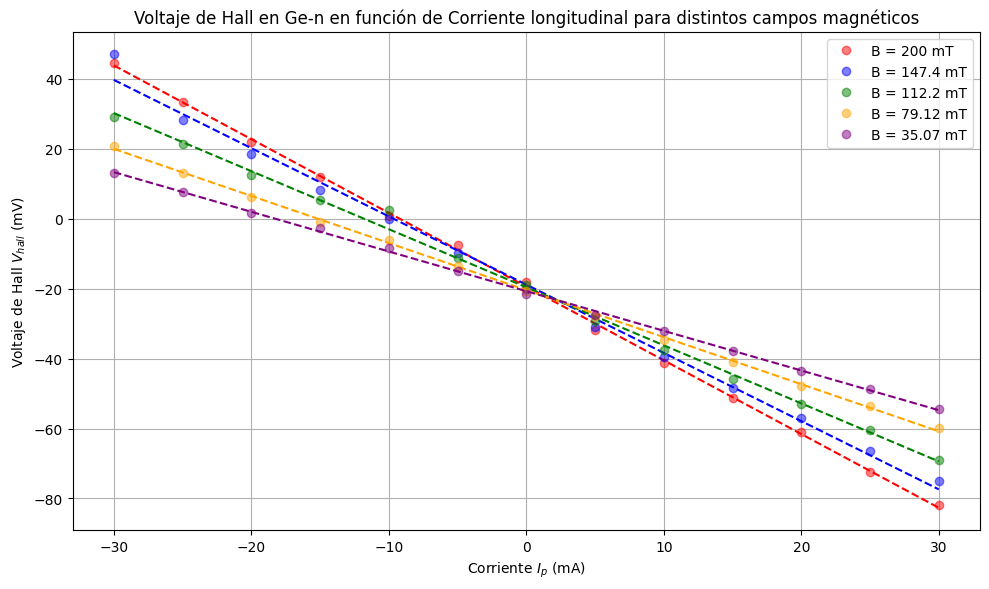

{200: {'m': np.float64(-2.107252747252748), 'b': np.float64(-19.430769230769233), 'error_m': np.float64(0.01508441226807595), 'r2': np.float64(0.9994366588320899)}, 147.4: {'m': np.float64(-1.9505494505494507), 'b': np.float64(-18.86923076923077), 'error_m': np.float64(0.040368264476561604), 'r2': np.float64(0.9953105971817457)}, 112.2: {'m': np.float64(-1.6593406593406594), 'b': np.float64(-19.623076923076923), 'error_m': np.float64(0.02795783141955538), 'r2': np.float64(0.9968870332213424)}, 79.12: {'m': np.float64(-1.3452747252747252), 'b': np.float64(-20.43076923076923), 'error_m': np.float64(0.009691648465147336), 'r2': np.float64(0.9994294178854046)}, 35.07: {'m': np.float64(-1.133956043956044), 'b': np.float64(-20.738461538461536), 'error_m': np.float64(0.009121841962586166), 'r2': np.float64(0.9992886942714791)}}
B = 200 mT → m = -2.107 ± 0.015, b = -19.43, R² = 0.9994, R_H = -1.053626373626374e-05 ±  7.542206134037975e-08
B = 147.4 mT → m = -1.951 ± 0.040, b = -18.87, R² = 0.9

In [38]:


# Datos experimentales
datos = {
    200:  [(-30, 44.6), (-25, 33.4), (-20, 21.9), (-15, 11.9), (-10, 0.8), (-5, -7.5), (0, -18), (5, -31.9), (10, -41.2), (15, -51.3), (20, -61), (25, -72.4), (30, -81.9)],
    147.4:[(-30, 46.9), (-25, 28.3), (-20, 18.4), (-15, 8.1), (-10, 0), (-5, -9.9), (0, -20), (5, -31), (10, -39.6), (15, -48.3), (20, -56.9), (25, -66.4), (30, -74.9)],
    112.2:[(-30, 29.1), (-25, 21.2), (-20, 12.4), (-15, 5.3), (-10, 2.4), (-5, -11.3), (0, -19), (5, -29.3), (10, -37.6), (15, -45.9), (20, -52.9), (25, -60.4), (30, -69.1)],
    79.12:[(-30, 20.8), (-25, 13), (-20, 6.2), (-15, -0.9), (-10, -6), (-5, -13.5), (0, -20.7), (5, -27.8), (10, -34.6), (15, -40.9), (20, -47.8), (25, -53.5), (30, -59.9)],
    35.07:[(-30, 13.1), (-25, 7.5), (-20, 1.6), (-15, -2.8), (-10, -8.4), (-5, -15), (0, -21.5), (5, -27.5), (10, -32), (15, -37.8), (20, -43.7), (25, -48.7), (30, -54.4)]
}

# Colores para cada B
colores = {
    200: 'red',
    147.4: 'blue',
    112.2: 'green',
    79.12: 'orange',
    35.07: 'purple'
}

# Diccionario para guardar resultados de regresión
regresiones = {}

# Gráfica
plt.figure(figsize=(10, 6))

for B, datos_B in datos.items():
    I_p, V_hall = zip(*datos_B)
    I_p = np.array(I_p)
    V_hall = np.array(V_hall)
    
    # Regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(I_p, V_hall)
    regresiones[B] = {
        'm': slope,
        'b': intercept,
        'error_m': std_err,
        'r2': r_value**2
    }
    
    # Gráfico
    plt.plot(I_p, V_hall, 'o', label=f'B = {B} mT', color=colores[B], alpha=0.5)
    plt.plot(I_p, slope * I_p + intercept, '-', color=colores[B], linestyle= "dashed")

plt.xlabel('Corriente $I_p$ (mA)')
plt.ylabel('Voltaje de Hall $V_{hall}$ (mV)')
plt.title('Voltaje de Hall en Ge-n en función de Corriente longitudinal para distintos campos magnéticos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Vh_vs_I_long_Ge-n.pdf", format='pdf')
plt.show()

# Imprimir parámetros de regresión
print(regresiones)
R_H_list = np.array([])
R_H_error_list = np.array([])
for B, params in regresiones.items():
    R_H= params['m']*(10**-3)/B
    R_H_error = params["error_m"]*(10**-3)/B
    R_H_list = np.append(R_H_list, R_H)
    R_H_error_list= np.append(R_H_error_list, R_H_error)
    print(f"B = {B} mT → m = {params['m']:.3f} ± {params['error_m']:.3f}, b = {params['b']:.2f}, R² = {params['r2']:.4f}, R_H = {R_H} ±  {R_H_error}")

print(R_H_list, R_H_error_list)
#1.1 Obtenemos el valor de R_H:

# Calcular los pesos
pesos = 1 / (R_H_error_list ** 2)

# Calcular el promedio ponderado
promedio_ponderado = np.sum(R_H_list * pesos) / np.sum(pesos)

# Calcular la incertidumbre del promedio ponderado
incertidumbre_promedio_ponderado = np.sqrt(1 / np.sum(pesos))

print(f"El valor representativo de R_H es: {promedio_ponderado:.3e} ± {incertidumbre_promedio_ponderado:.3e}")


Para Ge-p

C:\Users\ekkol\AppData\Local\Temp\ipykernel_21056\2130998184.py:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(I_p, slope * I_p + intercept, '-', color=colores[B], linestyle= "dashed")


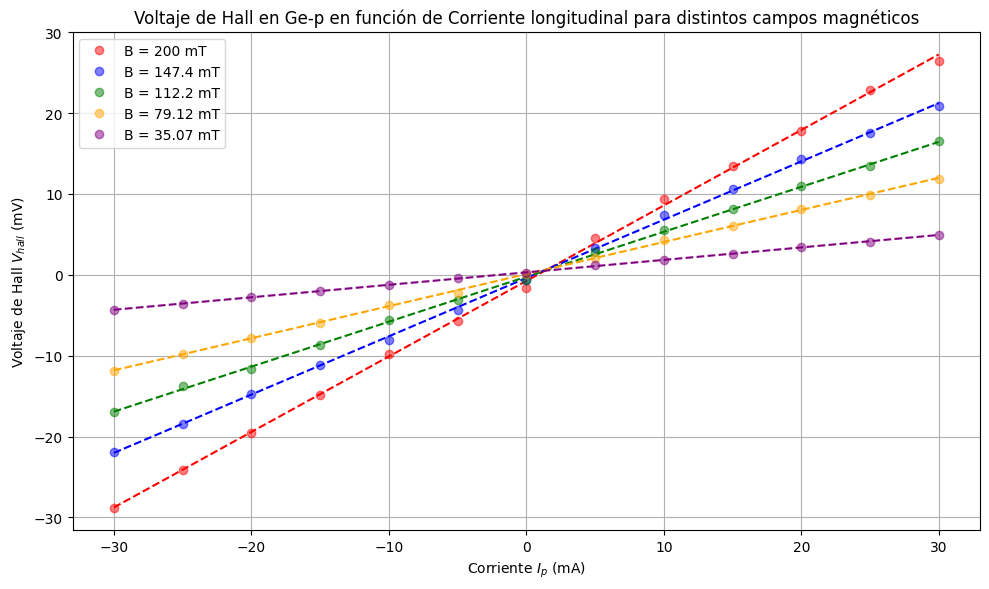

{200: {'m': np.float64(0.9336263736263737), 'b': np.float64(-0.7615384615384614), 'error_m': np.float64(0.007243356618555631), 'r2': np.float64(0.9993383341126977)}, 147.4: {'m': np.float64(0.7208791208791209), 'b': np.float64(-0.3923076923076913), 'error_m': np.float64(0.00448265451744394), 'r2': np.float64(0.9995748387806496)}, 112.2: {'m': np.float64(0.5559340659340659), 'b': np.float64(-0.23846153846153803), 'error_m': np.float64(0.0033316496097086194), 'r2': np.float64(0.9996050944726816)}, 79.12: {'m': np.float64(0.3967032967032968), 'b': np.float64(0.09230769230769156), 'error_m': np.float64(0.0023643211248095043), 'r2': np.float64(0.999609425097061)}, 35.07: {'m': np.float64(0.1541758241758242), 'b': np.float64(0.3076923076923078), 'error_m': np.float64(0.001047237075503511), 'r2': np.float64(0.9994927409658134)}}
B = 200 mT → m = 0.934 ± 0.007, b = -0.76, R² = 0.9993, R_H = 4.668131868131868e-06 ±  3.621678309277815e-08
B = 147.4 mT → m = 0.721 ± 0.004, b = -0.39, R² = 0.9996,

In [39]:


# Datos experimentales
datos = {
    200:  [(-30, -28.8), (-25, -24.1), (-20, -19.6), (-15, -14.8), (-10, -9.8), (-5, -5.7), (0, -1.6), (5, 4.5), (10, 9.4), (15, 13.4), (20, 17.8), (25, 22.9), (30, 26.5)],
    147.4:[(-30, -21.9), (-25, -18.4), (-20, -14.7), (-15, -11.1), (-10, -8.1), (-5, -4.3), (0, -0.6), (5, 3.3), (10, 7.4), (15, 10.6), (20, 14.3), (25, 17.5), (30, 20.9)],
    112.2:[(-30, -17), (-25, -13.8), (-20, -11.6), (-15, -8.7), (-10, -5.6), (-5, -3.1), (0, -0.6), (5, 2.8), (10, 5.5), (15, 8.1), (20, 11), (25, 13.4), (30, 16.5)],
    79.12:[(-30, -11.9), (-25, -9.8), (-20, -7.8), (-15, -5.9), (-10, -3.7), (-5, -2.2), (0, 0.1), (5, 2.1), (10, 4.3), (15, 6.1), (20, 8.2), (25, 9.9), (30, 11.8)],
    35.07:[(-30, -4.3), (-25, -3.6), (-20, -2.8), (-15, -2.0), (-10, -1.2), (-5, -0.4), (0, 0.2), (5, 1.2), (10, 1.8), (15, 2.6), (20, 3.5), (25, 4.1), (30, 4.9)]
}


# Colores para cada B
colores = {
    200: 'red',
    147.4: 'blue',
    112.2: 'green',
    79.12: 'orange',
    35.07: 'purple'
}

# Diccionario para guardar resultados de regresión
regresiones = {}

# Gráfica
plt.figure(figsize=(10, 6))

for B, datos_B in datos.items():
    I_p, V_hall = zip(*datos_B)
    I_p = np.array(I_p)
    V_hall = np.array(V_hall)
    
    # Regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(I_p, V_hall)
    regresiones[B] = {
        'm': slope,
        'b': intercept,
        'error_m': std_err,
        'r2': r_value**2
    }
    
    # Gráfico
    plt.plot(I_p, V_hall, 'o', label=f'B = {B} mT', color=colores[B], alpha=0.5)
    plt.plot(I_p, slope * I_p + intercept, '-', color=colores[B], linestyle= "dashed")

plt.xlabel('Corriente $I_p$ (mA)')
plt.ylabel('Voltaje de Hall $V_{hall}$ (mV)')
plt.title('Voltaje de Hall en Ge-p en función de Corriente longitudinal para distintos campos magnéticos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Vh_vs_I_long_Ge-p.pdf", format='pdf')
plt.show()

# Imprimir parámetros de regresión
print(regresiones)
R_H_list = np.array([])
R_H_error_list = np.array([])
for B, params in regresiones.items():
    R_H= params['m']*(10**-3)/B
    R_H_error = params["error_m"]*(10**-3)/B
    R_H_list = np.append(R_H_list, R_H)
    R_H_error_list= np.append(R_H_error_list, R_H_error)
    print(f"B = {B} mT → m = {params['m']:.3f} ± {params['error_m']:.3f}, b = {params['b']:.2f}, R² = {params['r2']:.4f}, R_H = {R_H} ±  {R_H_error}")

print(R_H_list, R_H_error_list)
#1.1 Obtenemos el valor de R_H:

# Calcular los pesos
pesos = 1 / (R_H_error_list ** 2)

# Calcular el promedio ponderado
promedio_ponderado = np.sum(R_H_list * pesos) / np.sum(pesos)

# Calcular la incertidumbre del promedio ponderado
incertidumbre_promedio_ponderado = np.sqrt(1 / np.sum(pesos))

print(f"El valor representativo de R_H es: {promedio_ponderado:.3e} ± {incertidumbre_promedio_ponderado:.3e}")

2. V_H en función de B_z, con corriente Constante. Estamos interesados en Calcular $R_H = \frac{V_H w}{I B_z}$, $\sigma = \frac{lI}{V_L*w*d}$, con $w = 10^-3$,  $d=10^-2$, $l=2 \times 10^-2$  para terminar calculando $\mu_H = |R_H|\sigma$.

Para Ge-n

C:\Users\ekkol\AppData\Local\Temp\ipykernel_21056\406950082.py:73: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(B_vals, slope * B_vals + intercept, '-', color=colores[Ip], linestyle="dashed")


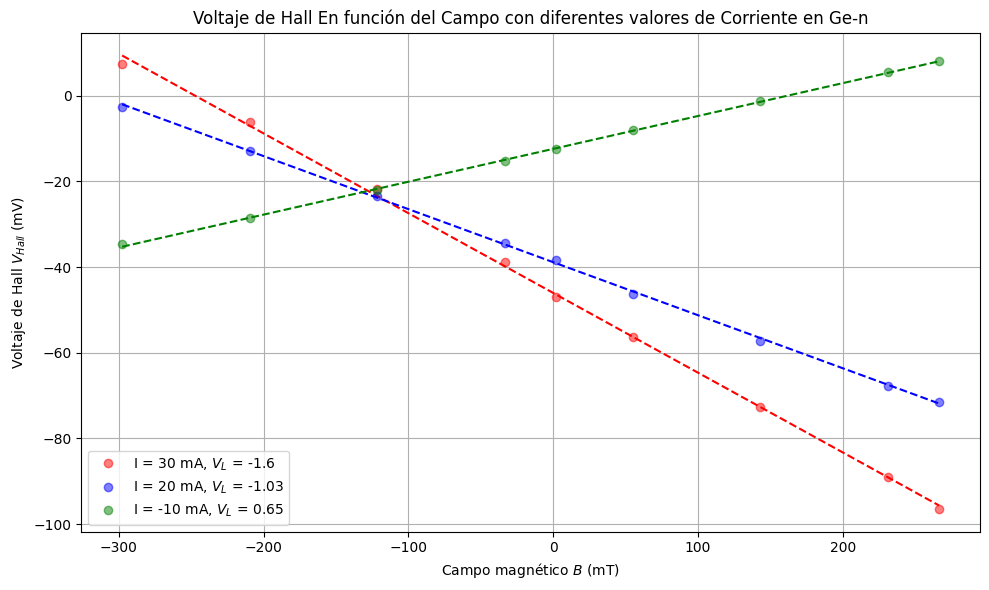

I_p = 30 mA:
  m = -0.18634 ± 0.00211 mV/mT
  R_H = (-6.21e-06 ± 7.02e-08) m³/C
  σ = (-37500.00 ± -667.50) S/m
  μ_h = (-2.3293e-01 ± -4.9115e-03) m²/V·s

I_p = 20 mA:
  m = -0.12391 ± 0.00103 mV/mT
  R_H = (-6.20e-06 ± 5.17e-08) m³/C
  σ = (-38834.95 ± -1041.52) S/m
  μ_h = (-2.4061e-01 ± -6.7579e-03) m²/V·s

I_p = -10 mA:
  m = 0.07680 ± 0.00059 mV/mT
  R_H = (-7.68e-06 ± 5.87e-08) m³/C
  σ = (-30769.23 ± -1609.64) S/m
  μ_h = (-2.3632e-01 ± -1.2494e-02) m²/V·s

——— Promedios ponderados ———
R_H = (-6.697e-06 ± 3.395e-08) m³/C
σ = (-37115.13 ± 530.58) S/m
μ_h = (-2.3565e-01 ± 3.7862e-03) m²/V·s
n = (-9.321e+23 ± 4.725e+21) portadores/m³


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Datos de B vs V_Hall para distintas Ip
datos_por_Ip = {
    30: [(-297.6107, 7.4), (-209.4867, -6.2), (-121.3627, -21.8), (-33.2387, -38.9), (2.0109, -46.9),
         (54.8853, -56.4), (143.0093, -72.7), (231.1333, -89), (266.3829, -96.5)],
    20: [(-297.6107, -2.5), (-209.4867, -12.8), (-121.3627, -23.5), (-33.2387, -34.3), (2.0109, -38.3),
         (54.8853, -46.2), (143.0093, -57.3), (231.1333, -67.7), (266.3829, -71.5)],
    -10: [(-297.6107, -34.7), (-209.4867, -28.6), (-121.3627, -22.1), (-33.2387, -15.3), (2.0109, -12.4),
          (54.8853, -8), (143.0093, -1.2), (231.1333, 5.5), (266.3829, 8.1)]
}

# Voltajes longitudinales correspondientes (en voltios)
V_long_por_Ip = {
    30: -1.6,
    20: -1.03,
    -10: 0.65
}

# Errores conocidos
delta_Ip = 0.5  # en mA
delta_Vlong = 0.01  # en V

# Constante de escala
factor_sigma = 2e3

# Colores para graficar
colores = {30: 'red', 20: 'blue', -10: 'green'}

# Diccionario de resultados
regresiones = {}

# Gráfica
plt.figure(figsize=(10, 6))

for Ip, datos in datos_por_Ip.items():
    B_vals, V_H_vals = zip(*datos)
    B_vals = np.array(B_vals)
    V_H_vals = np.array(V_H_vals)

    # Regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(B_vals, V_H_vals)
    RH = slope * 1e-3 / Ip
    RH_err = std_err * 1e-3 / abs(Ip)

    # Sigma y su error
    V_long = V_long_por_Ip[Ip]
    sigma = factor_sigma * (Ip / V_long)
    sigma_err = sigma * np.sqrt((delta_Ip / Ip)**2 + (delta_Vlong / V_long)**2)

    # Movilidad y su error
    mu_h = abs(RH) * sigma
    mu_h_err = mu_h * np.sqrt((RH_err / RH)**2 + (sigma_err / sigma)**2)

    # Guardar resultados
    regresiones[Ip] = {
        'm': slope,
        'b': intercept,
        'error_m': std_err,
        'R_H': RH,
        'R_H_err': RH_err,
        'sigma': sigma,
        'sigma_err': sigma_err,
        'mu_h': mu_h,
        'mu_h_err': mu_h_err,
        'r2': r_value**2
    }

    # Gráfica
    plt.plot(B_vals, V_H_vals, 'o', label=f'I = {Ip} mA, $V_{"L"}$ = {V_long}', color=colores[Ip], alpha=0.5)
    plt.plot(B_vals, slope * B_vals + intercept, '-', color=colores[Ip], linestyle="dashed")

plt.xlabel('Campo magnético $B$ (mT)')
plt.ylabel('Voltaje de Hall $V_{Hall}$ (mV)')
plt.title('Voltaje de Hall En función del Campo con diferentes valores de Corriente en Ge-n')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Vh_vs_B_Ge-n.pdf", format='pdf')
plt.show()

# Listas para promedios ponderados
RH_list, RH_err_list = [], []
sigma_list, sigma_err_list = [], []
mu_h_list, mu_h_err_list = [], []

# Mostrar resultados
for Ip, r in regresiones.items():
    print(f"I_p = {Ip} mA:")
    print(f"  m = {r['m']:.5f} ± {r['error_m']:.5f} mV/mT")
    print(f"  R_H = ({r['R_H']:.2e} ± {r['R_H_err']:.2e}) m³/C")
    print(f"  σ = ({r['sigma']:.2f} ± {r['sigma_err']:.2f}) S/m")
    print(f"  μ_h = ({r['mu_h']:.4e} ± {r['mu_h_err']:.4e}) m²/V·s\n")
    RH_list.append(r['R_H'])
    RH_err_list.append(r['R_H_err'])
    sigma_list.append(r['sigma'])
    sigma_err_list.append(r['sigma_err'])
    mu_h_list.append(r['mu_h'])
    mu_h_err_list.append(r['mu_h_err'])

# Función de promedio ponderado
def promedio_ponderado(valores, errores):
    valores = np.array(valores)
    errores = np.array(errores)
    pesos = 1 / errores**2
    promedio = np.sum(valores * pesos) / np.sum(pesos)
    error_promedio = np.sqrt(1 / np.sum(pesos))
    return promedio, error_promedio

# Promedios ponderados
RH_prom, RH_err_prom = promedio_ponderado(RH_list, RH_err_list)
sigma_prom, sigma_err_prom = promedio_ponderado(sigma_list, sigma_err_list)
mu_h_prom, mu_h_err_prom = promedio_ponderado(mu_h_list, mu_h_err_list)

# Resultados finales
print("——— Promedios ponderados ———")
print(f"R_H = ({RH_prom:.3e} ± {RH_err_prom:.3e}) m³/C")
print(f"σ = ({sigma_prom:.2f} ± {sigma_err_prom:.2f}) S/m")
print(f"μ_h = ({mu_h_prom:.4e} ± {mu_h_err_prom:.4e}) m²/V·s")

# q Carga del electrón
e = 1.602e-19  # Carga del electrón en coulombs

# Cálculo de n y su incertidumbre
n = 1 / (RH_prom * e)
n_err = RH_err_prom / (RH_prom**2 * e)

# Imprimir
print(f"n = ({n:.3e} ± {n_err:.3e}) portadores/m³")




Para Ge-Pe

C:\Users\ekkol\AppData\Local\Temp\ipykernel_21056\1068782382.py:69: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(B_vals, slope * B_vals + intercept, '-', color=colores[Ip], linestyle="dashed")


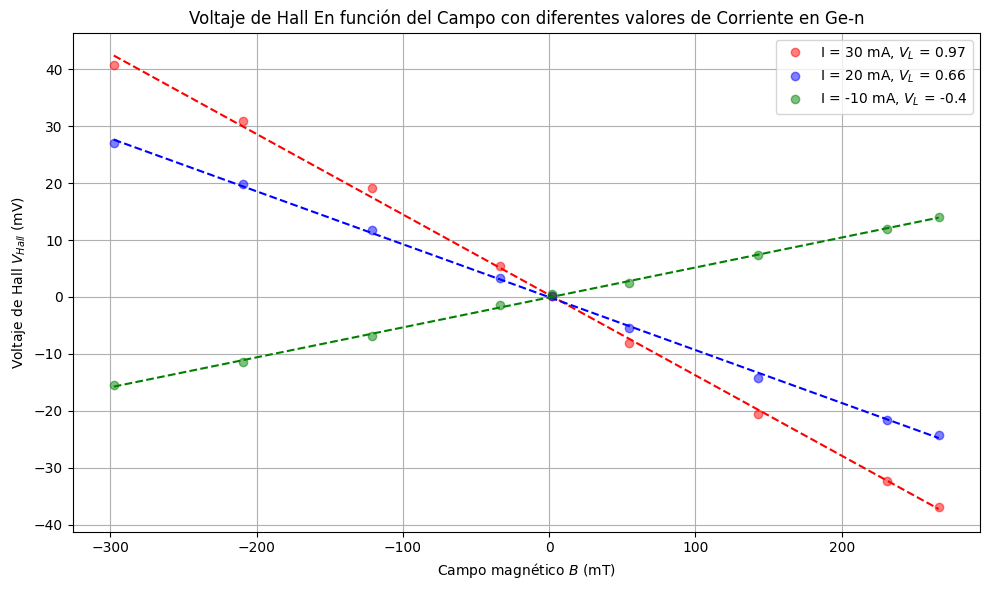

I_p = 30 mA:
  m = -0.14127 ± 0.00188 mV/mT
  R_H = (-4.71e-06 ± 6.28e-08) m³/C
  σ = (61855.67 ± 1212.21) S/m
  μ_h = (2.9127e-01 ± 6.9039e-03) m²/V·s

I_p = 20 mA:
  m = -0.09294 ± 0.00110 mV/mT
  R_H = (-4.65e-06 ± 5.49e-08) m³/C
  σ = (60606.06 ± 1771.70) S/m
  μ_h = (2.8164e-01 ± 8.8792e-03) m²/V·s

I_p = -10 mA:
  m = 0.05263 ± 0.00066 mV/mT
  R_H = (-5.26e-06 ± 6.56e-08) m³/C
  σ = (50000.00 ± 2795.08) S/m
  μ_h = (2.6315e-01 ± 1.5071e-02) m²/V·s

——— Promedios ponderados ———
R_H = (-4.841e-06 ± 3.495e-08) m³/C
σ = (60156.07 ± 941.93) S/m
μ_h = (2.8481e-01 ± 5.1254e-03) m²/V·s
p = (-1.289e+24 ± 9.309e+21) portadores/m³


In [52]:
datos_por_Ip = {
    30: [(-297.6107, 40.8), (-209.4867, 30.9), (-121.3627, 19.1), (-33.2387, 5.4), (2.0109, 0.1),
         (54.8853, -8.1), (143.0093, -20.6), (231.1333, -32.4), (266.3829, -36.9)],
    
    20: [(-297.6107, 27.0), (-209.4867, 19.8), (-121.3627, 11.7), (-33.2387, 3.4), (2.0109, 0.2),
         (54.8853, -5.5), (143.0093, -14.3), (231.1333, -21.7), (266.3829, -24.2)],
    
    -10: [(-297.6107, -15.5), (-209.4867, -11.5), (-121.3627, -6.8), (-33.2387, -1.5), (2.0109, 0.6),
          (54.8853, 2.5), (143.0093, 7.3), (231.1333, 12.0), (266.3829, 14.0)]
}

# Nuevos voltajes longitudinales (en V) para cada corriente Ip
V_long_por_Ip = {
    30: 0.97,
    20: 0.66,
    -10: -0.4
}
# Errores conocidos
delta_Ip = 0.5  # en mA
delta_Vlong = 0.01  # en V

# Constante de escala
factor_sigma = 2e3

# Colores para graficar
colores = {30: 'red', 20: 'blue', -10: 'green'}

# Diccionario de resultados
regresiones = {}

# Gráfica
plt.figure(figsize=(10, 6))

for Ip, datos in datos_por_Ip.items():
    B_vals, V_H_vals = zip(*datos)
    B_vals = np.array(B_vals)
    V_H_vals = np.array(V_H_vals)

    # Regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(B_vals, V_H_vals)
    RH = slope * 1e-3 / Ip
    RH_err = std_err * 1e-3 / abs(Ip)

    # Sigma y su error
    V_long = V_long_por_Ip[Ip]
    sigma = factor_sigma * (Ip / V_long)
    sigma_err = sigma * np.sqrt((delta_Ip / Ip)**2 + (delta_Vlong / V_long)**2)

    # Movilidad y su error
    mu_h = abs(RH) * sigma
    mu_h_err = mu_h * np.sqrt((RH_err / RH)**2 + (sigma_err / sigma)**2)

    # Guardar resultados
    regresiones[Ip] = {
        'm': slope,
        'b': intercept,
        'error_m': std_err,
        'R_H': RH,
        'R_H_err': RH_err,
        'sigma': sigma,
        'sigma_err': sigma_err,
        'mu_h': mu_h,
        'mu_h_err': mu_h_err,
        'r2': r_value**2
    }

    # Gráfica
    plt.plot(B_vals, V_H_vals, 'o', label=f'I = {Ip} mA, $V_{"L"}$ = {V_long}', color=colores[Ip], alpha=0.5)
    plt.plot(B_vals, slope * B_vals + intercept, '-', color=colores[Ip], linestyle="dashed")

plt.xlabel('Campo magnético $B$ (mT)')
plt.ylabel('Voltaje de Hall $V_{Hall}$ (mV)')
plt.title('Voltaje de Hall En función del Campo con diferentes valores de Corriente en Ge-n')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Vh_vs_B_Ge-p.pdf", format='pdf')
plt.show()

# Listas para promedios ponderados
RH_list, RH_err_list = [], []
sigma_list, sigma_err_list = [], []
mu_h_list, mu_h_err_list = [], []

# Mostrar resultados
for Ip, r in regresiones.items():
    print(f"I_p = {Ip} mA:")
    print(f"  m = {r['m']:.5f} ± {r['error_m']:.5f} mV/mT")
    print(f"  R_H = ({r['R_H']:.2e} ± {r['R_H_err']:.2e}) m³/C")
    print(f"  σ = ({r['sigma']:.2f} ± {r['sigma_err']:.2f}) S/m")
    print(f"  μ_h = ({r['mu_h']:.4e} ± {r['mu_h_err']:.4e}) m²/V·s\n")
    RH_list.append(r['R_H'])
    RH_err_list.append(r['R_H_err'])
    sigma_list.append(r['sigma'])
    sigma_err_list.append(r['sigma_err'])
    mu_h_list.append(r['mu_h'])
    mu_h_err_list.append(r['mu_h_err'])

# Función de promedio ponderado
def promedio_ponderado(valores, errores):
    valores = np.array(valores)
    errores = np.array(errores)
    pesos = 1 / errores**2
    promedio = np.sum(valores * pesos) / np.sum(pesos)
    error_promedio = np.sqrt(1 / np.sum(pesos))
    return promedio, error_promedio

# Promedios ponderados
RH_prom, RH_err_prom = promedio_ponderado(RH_list, RH_err_list)
sigma_prom, sigma_err_prom = promedio_ponderado(sigma_list, sigma_err_list)
mu_h_prom, mu_h_err_prom = promedio_ponderado(mu_h_list, mu_h_err_list)

# Resultados finales
print("——— Promedios ponderados ———")
print(f"R_H = ({RH_prom:.3e} ± {RH_err_prom:.3e}) m³/C")
print(f"σ = ({sigma_prom:.2f} ± {sigma_err_prom:.2f}) S/m")
print(f"μ_h = ({mu_h_prom:.4e} ± {mu_h_err_prom:.4e}) m²/V·s")

# q Carga del electrón
e = 1.602e-19  # Carga del electrón en coulombs

# Cálculo de n y su incertidumbre
n = 1 / (RH_prom * e)
n_err = RH_err_prom / (RH_prom**2 * e)

# Imprimir
print(f"p = ({n:.3e} ± {n_err:.3e}) portadores/m³")




2.4: Hablar de los portadores de carga en el informe. A partir de los valores de $R_H$ y la carga elemental, encontrar la densidad de estados de n y p siguiendo la ecuación $R_H = \frac{1}{q*densidad}$, donde n en la anterior formula se refiere a la densidad de estados.

Del anterior codigo obtenemos que: p = (1.289e+24 ± 9.309e+21) portadores/m³
y n = (9.321e+23 ± 4.725e+21) portadores/m³

2.5 Se muestra que son portadores extrinsecos, puesto que hay demasiada cantidad para que sean intrínsecos, es decir, por portadores que saltan por excitacion térmica.

Actividad 3: (Para Ge-P)
1. B=0, T=20°c (ambiente). Calcular R_0 via ley de Ohm: $R_0 = \frac{V_L}{Ip=30}$, y de ahi calcular $\sigma = \frac{l}{R*A}$. Con las mismas dimensiones: $w = 10^-3$,  $d=10^-2$, $l=2 \times 10^-2$. A = w*d = $10^-5 mm^2$.

Respuesta: R_0 =33.0±0.6Ω, y 
            σ≈60.6 ± 1.101 Ω-1 m-1
        

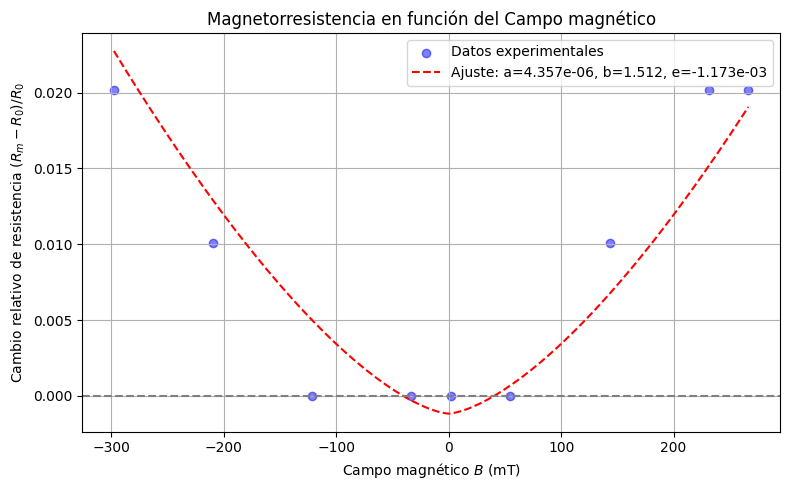

—— Ajuste de ley de potencia ——
a = 4.357e-06 ± 1.463e-05
b = 1.512 ± 0.587
e = -1.173e-03 ± 2.712e-03


In [58]:

from scipy.optimize import curve_fit

# Datos experimentales
B_vals = np.array([-297.6107, -209.4867, -121.3627, -33.2387, 2.0109, 54.8853, 143.0093, 231.1333, 266.3829])
V_L_vals = np.array([1.01, 1.00, 0.99, 0.99, 0.99, 0.99, 1.00, 1.01, 1.01])  # en voltios
I_p = 0.03  # corriente constante en amperios

# Resistencia medida con campo magnético
R_m = V_L_vals / I_p

# Valor base (con B = 0), dado experimentalmente
R_0 = 33.0  # ohmios
delta_R0 = 0.6  # error

# Cambio relativo en resistencia
delta_R = (R_m - R_0) / R_0

# Función de ajuste tipo ley de potencia
def ley_potencia(B, a, b, e):
    return a * np.abs(B)**b + e  # usar valor absoluto de B por simetría

# Ajuste de curva
params, cov = curve_fit(ley_potencia, B_vals, delta_R)
a, b, e = params
a_err, b_err, e_err = np.sqrt(np.diag(cov))

# Gráfica
B_plot = np.linspace(min(B_vals), max(B_vals), 300)
plt.figure(figsize=(8, 5))
plt.scatter(B_vals, delta_R, label='Datos experimentales', color='blue', alpha=0.5)
plt.plot(B_plot, ley_potencia(B_plot, *params), label=f'Ajuste: a={a:.3e}, b={b:.3f}, e={e:.3e}', color='red', linestyle="dashed")
plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('Campo magnético $B$ (mT)')
plt.ylabel('Cambio relativo de resistencia $(R_m - R_0)/R_0$')
plt.title('Magnetorresistencia en función del Campo magnético')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("magnetoresistencia_Ge-p.pdf", format="pdf")
plt.show()

# Resultados del ajuste
print("—— Ajuste de ley de potencia ——")
print(f"a = {a:.3e} ± {a_err:.3e}")
print(f"b = {b:.3f} ± {b_err:.3f}")
print(f"e = {e:.3e} ± {e_err:.3e}")


Para Ge-n:
1. R_0 es 53.7±0.03Ω y la resistividad σ es 37.2±0.02 Ω −1m −1

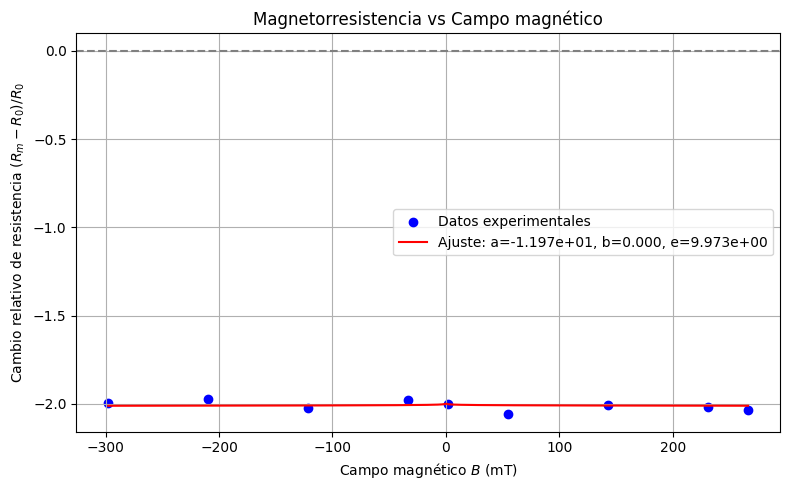

—— Ajuste de ley de potencia ——
a = -1.197e+01 ± 4.092e+05
b = 0.000 ± 5.077
e = 9.973e+00 ± 4.092e+05


In [59]:
from scipy.optimize import curve_fit

# Nuevos datos experimentales
B_vals = np.array([-297.6107, -209.4867, -121.3627, -33.2387, 2.0109, 54.8853, 143.0093, 231.1333, 266.3829])
V_L_vals = np.array([-1.6, -1.563, -1.65, -1.573, -1.61, -1.7, -1.62, -1.64, -1.67])  # en voltios
I_p = 0.03  # en amperios (constante)

# Resistencia medida con campo magnético
R_m = V_L_vals / I_p

# Valor de referencia sin campo magnético
R_0 = 53.7  # ohmios
delta_R0 = 0.03  # incertidumbre

# Cambio relativo en la resistencia
delta_R = (R_m - R_0) / R_0

# Función de ajuste tipo ley de potencia
def ley_potencia(B, a, b, e):
    return a * np.abs(B)**b + e

# Ajuste de los datos
params, cov = curve_fit(ley_potencia, B_vals, delta_R)
a, b, e = params
a_err, b_err, e_err = np.sqrt(np.diag(cov))

# Gráfica
B_plot = np.linspace(min(B_vals), max(B_vals), 300)
plt.figure(figsize=(8, 5))
plt.scatter(B_vals, delta_R, label='Datos experimentales', color='blue')
plt.plot(B_plot, ley_potencia(B_plot, *params), label=f'Ajuste: a={a:.3e}, b={b:.3f}, e={e:.3e}', color='red')
plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('Campo magnético $B$ (mT)')
plt.ylabel('Cambio relativo de resistencia $(R_m - R_0)/R_0$')
plt.title('Magnetorresistencia vs Campo magnético')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultados del ajuste
print("—— Ajuste de ley de potencia ——")
print(f"a = {a:.3e} ± {a_err:.3e}")
print(f"b = {b:.3f} ± {b_err:.3f}")
print(f"e = {e:.3e} ± {e_err:.3e}")
